# Assignment 1 - Exploratory Data Analysis

## Import libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

## Load Penguins Dataset

In [47]:
# https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris
# https://inria.github.io/scikit-learn-mooc/python_scripts/trees_dataset.html
# https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn
# https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Dealing with missing data

In [48]:
# drop all empty values
newPenguins = penguins.dropna()
# write to an excel file
newPenguins.to_excel('Penguins.xlsx')
newPenguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Exploratory Data Analysis

### Plot bill_length_mm and bill_depth_mm

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

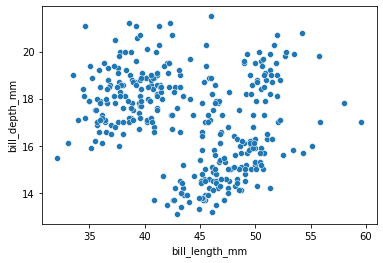

In [49]:
sns.scatterplot(data = newPenguins,x="bill_length_mm",y="bill_depth_mm")

### Check how many species there are

In [87]:
target_names = newPenguins['species'].unique()
target_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Extract all quantitive feature names

In [91]:
feature_names = newPenguins.columns[2:6]
feature_names

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [51]:
newPenguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

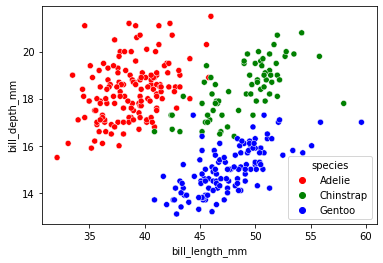

In [52]:
color_palette = {'Adelie':'red','Chinstrap':'green','Gentoo':'blue'}
sns.scatterplot(data=newPenguins,x="bill_length_mm",y="bill_depth_mm",hue='species',palette=color_palette)

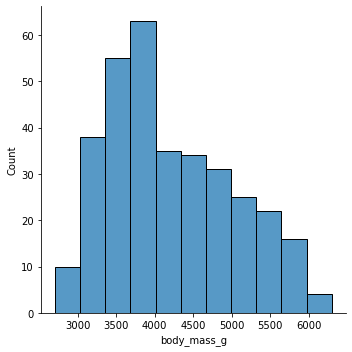

In [53]:
sns.displot(data=newPenguins, x='body_mass_g')

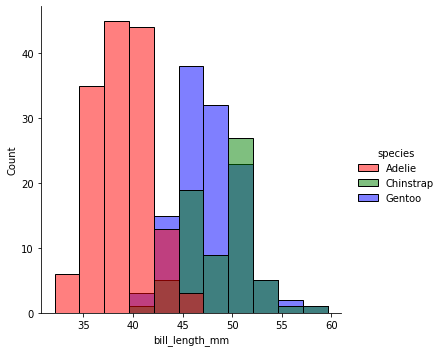

In [54]:
sns.displot(data = newPenguins,x='bill_length_mm',hue='species', palette=color_palette)

### flipper_length_mm

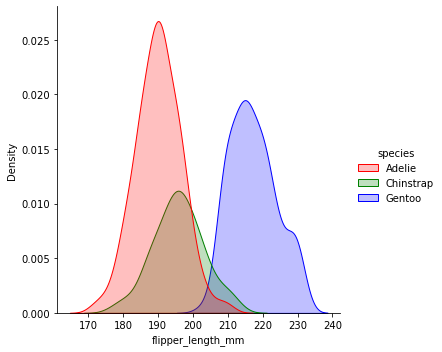

In [55]:
sns.displot(data = newPenguins , x='flipper_length_mm',palette = color_palette, hue='species',kind = 'kde',fill = True)

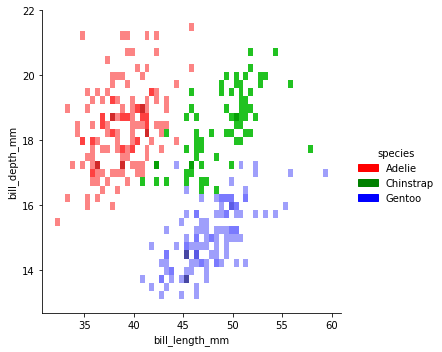

In [56]:
sns.displot(data = newPenguins, x='bill_length_mm',y = 'bill_depth_mm', binwidth = (0.5,0.25),hue = 'species',palette=color_palette )

### Joint plot

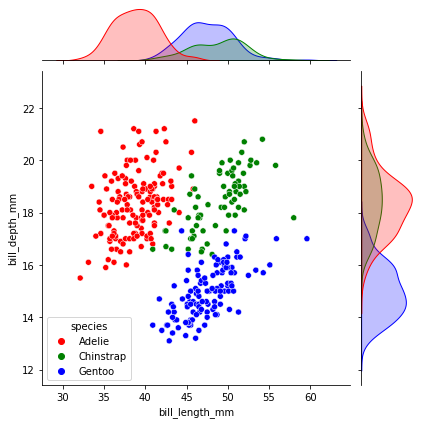

In [57]:
sns.jointplot(data=newPenguins,x='bill_length_mm',y = 'bill_depth_mm',hue = 'species', palette=color_palette)

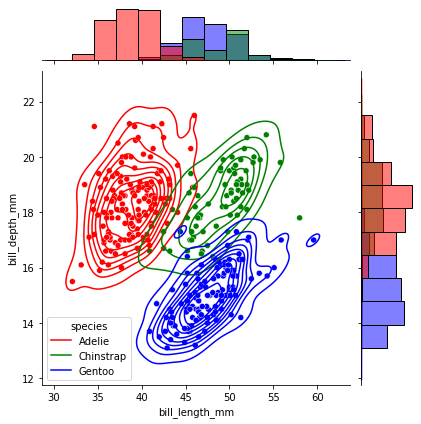

In [58]:
g = sns.jointplot(data=newPenguins,x='bill_length_mm',y = 'bill_depth_mm',hue = 'species', palette=color_palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

### Pairplot

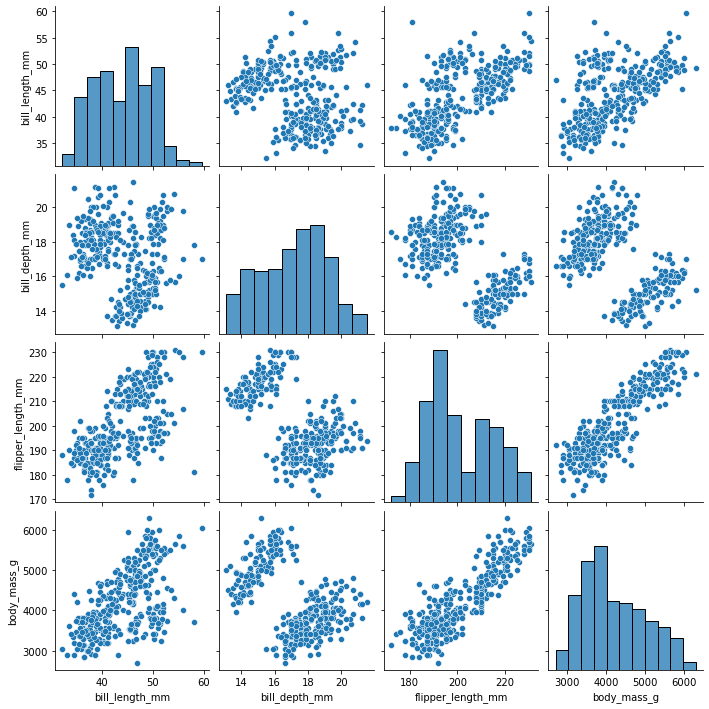

In [59]:
sns.pairplot(data = newPenguins, vars = newPenguins.columns[2:6])

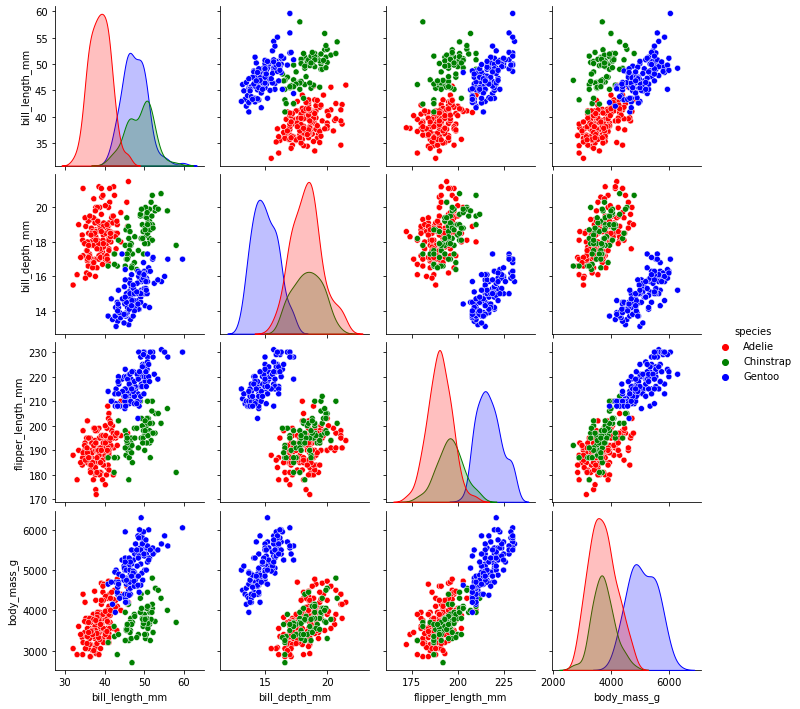

In [60]:
sns.pairplot(data = newPenguins,vars = newPenguins.columns[2:6],hue = 'species',palette=color_palette)
# plt.savefig('iris.pdf')

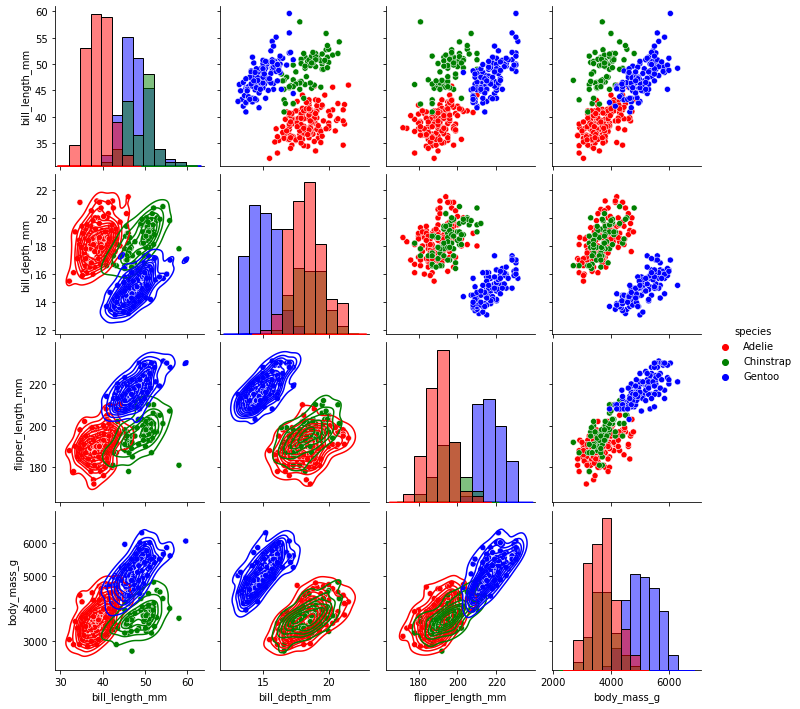

In [61]:
g = sns.pairplot(data=newPenguins, vars=newPenguins.columns[2:6], hue='species', palette=color_palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

## Split to training set and test set

In [62]:
X = newPenguins.iloc[:,2:-1]
y = newPenguins.iloc[:,0:1]

In [63]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [64]:
y

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie
...,...
338,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


### Encode the dependent Varible

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/home/quang/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=10)

In [137]:
y_train

array([0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 1,
       0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1,
       0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2,
       0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0,
       0, 2])

## Train the Decision tree classification on the training set

### Feature scaling

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [139]:
X_train.shape

(266, 4)

In [140]:
X_test.shape

(67, 4)

### Model 1 max_depth = 3

In [141]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=3,random_state = 42)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Model 2 max_depth = 5

In [142]:
model_2 = DecisionTreeClassifier(max_depth=5,random_state = 42)
model_2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Model 3 max_depth =10

In [143]:
model_3 = DecisionTreeClassifier(max_depth = 10,random_state = 42)
model_3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

### Model 4 max_depth = 50

In [144]:
model_4 = DecisionTreeClassifier(max_depth = 50,random_state = 42)
model_4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=50, random_state=42)

### Draw decision trees

In [145]:
from graphviz import Source
from sklearn.tree import export_graphviz

#### First tree

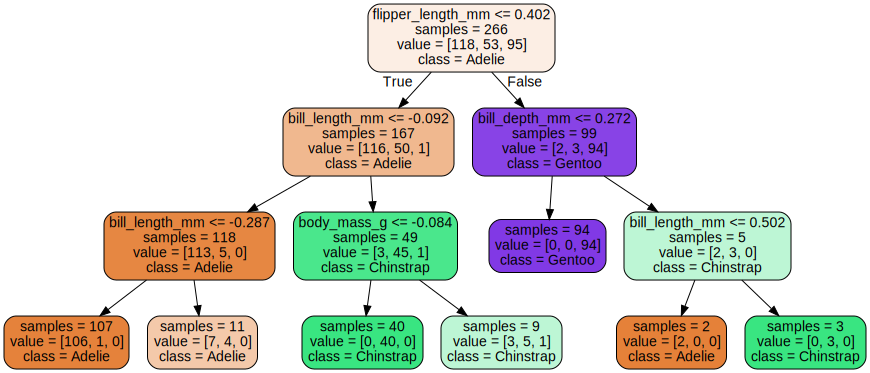

In [146]:
export_graphviz(model_1, out_file='penguins_1.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins_1.dot')

#### Second tree

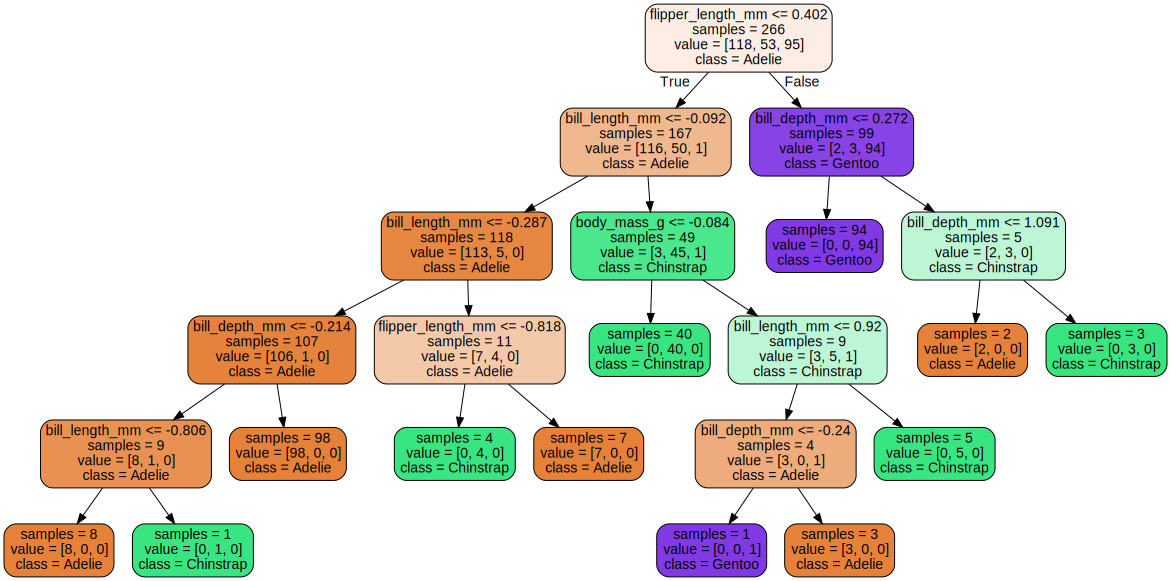

In [147]:
export_graphviz(model_2, out_file='penguins_2.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins_2.dot')

#### Third tree

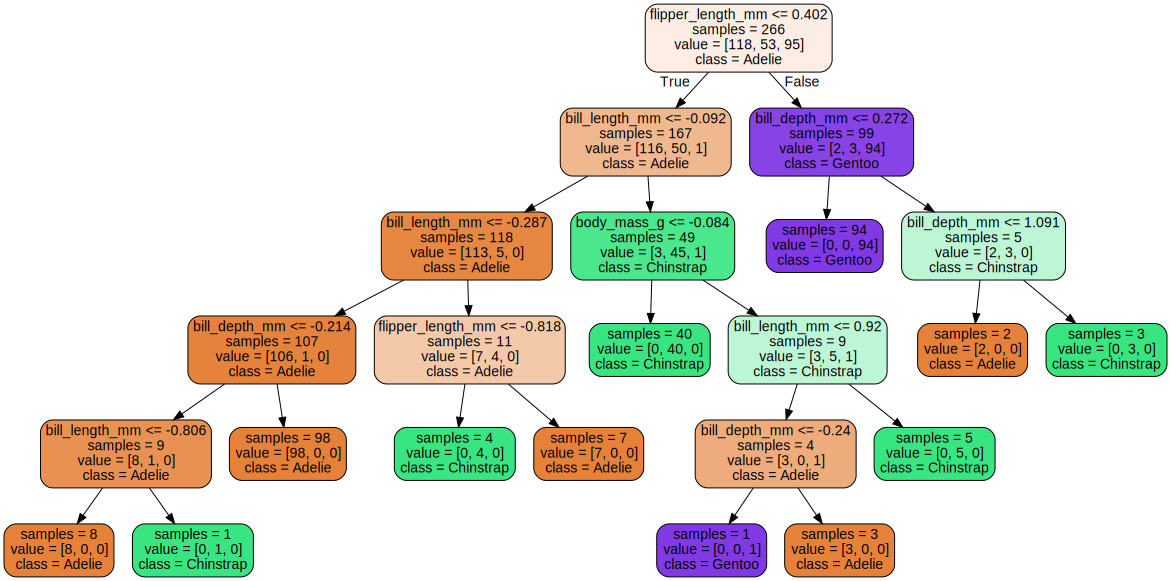

In [148]:
export_graphviz(model_3, out_file='penguins_3.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins_3.dot')

#### Forth tree

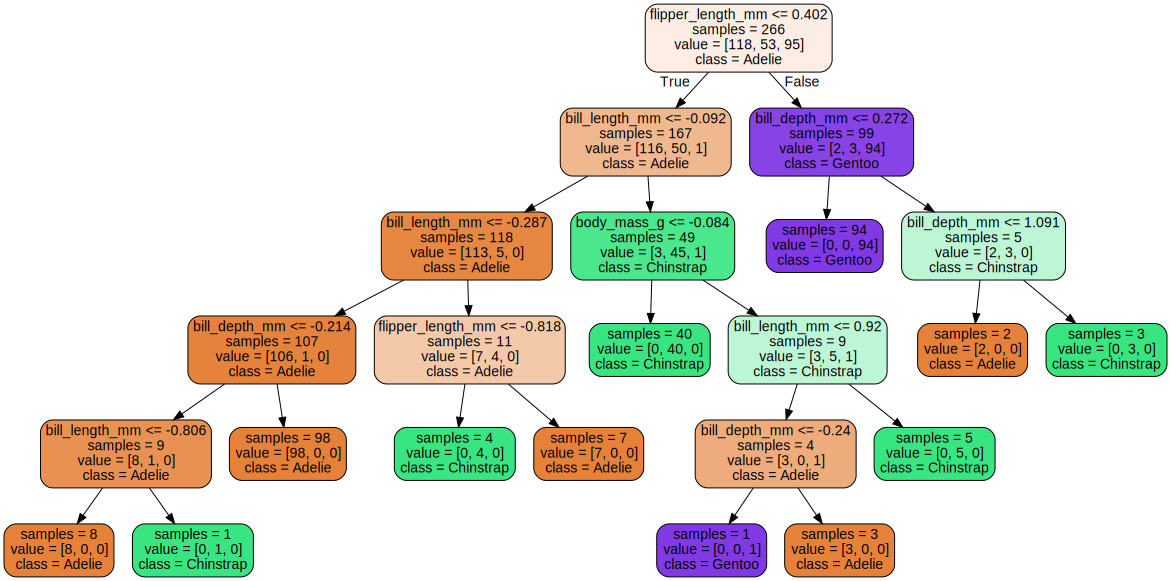

In [149]:
export_graphviz(model_4, out_file='penguins_4.dot', feature_names=feature_names, class_names=target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins_4.dot')

## Predict the species based on quantitive data

In [150]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)


## Evaluation of models

### Making confusion matrices

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_1 =  confusion_matrix(y_test, y_pred_1)
cm_2 =  confusion_matrix(y_test, y_pred_2)
cm_3 =  confusion_matrix(y_test, y_pred_3)
print('Confusion matrix of the first decision tree with max_depth = 3:')
print(cm_1)
print('Confusion matrix of the second decision tree with max_depth = 5:')
print(cm_2)
print('Confusion matrix of the third decision tree with max_depth = 10:')
print(cm_3)

Confusion matrix of the first decision tree with max_depth = 3:
[[27  1  0]
 [ 0 15  0]
 [ 0  0 24]]
Confusion matrix of the second decision tree with max_depth = 5:
[[27  1  0]
 [ 2 13  0]
 [ 0  0 24]]
Confusion matrix of the third decision tree with max_depth = 10:
[[27  1  0]
 [ 2 13  0]
 [ 0  0 24]]


In [154]:
print('Accuracy score of the first tree: {}'.format(accuracy_score(y_test,y_pred_1)))
print('Accuracy score of the second tree: {}'.format(accuracy_score(y_test,y_pred_2)))
print('Accuracy score of the third tree: {}'.format(accuracy_score(y_test,y_pred_3)))


Accuracy score of the first tree: 0.9850746268656716
Accuracy score of the second tree: 0.9552238805970149
Accuracy score of the third tree: 0.9552238805970149


## Conclusion

After having tweaked max_depth hyperparameter, even max_depth parameter was set to **50**, surprisingly, the result was not altered, deal to the fact the trees only go maximally **5 level in depth**. But with a lower value of this parameter (max_depth = 3) the accuracy score increased slightly, deal to the fact that the model had better generalization, therefore the performance was improved on the test set.

Accuracy_score of the model with max_depth = 3 was about ***98.50%***

Accuracy_score(s) of all the model being tested above **(with max_depth>3)** remained the same and stable at roughly ***95,52%***
